# Part 1 - Plotting

First, we start by importing the required libraries:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

Next, we read each `csv` file into a pandas dataframe and average the three runs from each of the two separate day:

In [10]:
# Import data from run 1
df1_cpu = pd.read_csv('../part1-data/230318-cca-data-part1/230318-cpu.csv')
df1_l1d = pd.read_csv('../part1-data/230318-cca-data-part1/230318-l1d.csv')
df1_l1i = pd.read_csv('../part1-data/230318-cca-data-part1/230318-l1i.csv')
df1_l2 = pd.read_csv('../part1-data/230318-cca-data-part1/230318-l2.csv')
df1_llc = pd.read_csv('../part1-data/230318-cca-data-part1/230318-llc.csv')
df1_mem = pd.read_csv('../part1-data/230318-cca-data-part1/230318-membw.csv')
df1_noinf = pd.read_csv('../part1-data/230318-cca-data-part1/230318-nointerference.csv')

# Import data from run 2
df2_cpu = pd.read_csv('../part1-data/230322-cca-data-part1/230322-cpu.csv')
df2_l1d = pd.read_csv('../part1-data/230322-cca-data-part1/230322-l1d.csv')
df2_l1i = pd.read_csv('../part1-data/230322-cca-data-part1/230322-l1i.csv')
df2_l2 = pd.read_csv('../part1-data/230322-cca-data-part1/230322-l2.csv')
df2_llc = pd.read_csv('../part1-data/230322-cca-data-part1/230322-llc.csv')
df2_mem = pd.read_csv('../part1-data/230322-cca-data-part1/230322-membw.csv')
df2_noinf = pd.read_csv('../part1-data/230322-cca-data-part1/230322-nointerference.csv')

# Concatenate dataframes
df_cpu = pd.concat([df1_cpu, df2_cpu], ignore_index=True)
df_l1d = pd.concat([df1_l1d, df2_l1d], ignore_index=True)
df_l1i = pd.concat([df1_l1i, df2_l1i], ignore_index=True)
df_l2 = pd.concat([df1_l2, df2_l2], ignore_index=True)
df_llc = pd.concat([df1_llc, df2_llc], ignore_index=True)
df_mem = pd.concat([df1_mem, df2_mem], ignore_index=True)
df_noinf = pd.concat([df1_noinf, df2_noinf], ignore_index=True)

# Average data from each run
def average_runs(dataframe, num_runs, rows_per_run):
    averaged_data = []

    for i in range(rows_per_run):
        start_indices = [i + j * rows_per_run for j in range(num_runs)]
        temp_df = dataframe.iloc[start_indices]
        averaged_row = temp_df.mean(axis=0, numeric_only=True) # Explicitly set numeric_only to True since we have one row with a string
        averaged_data.append(averaged_row)

    averaged_df = pd.DataFrame(averaged_data, columns=dataframe.columns)
    return averaged_df

df_cpu = average_runs(df_cpu, 3, 17)
df_l1d = average_runs(df_l1d, 3, 17)
df_l1i = average_runs(df_l1i, 3, 17)
df_l2 = average_runs(df_l2, 3, 17)
df_llc = average_runs(df_llc, 3, 17)
df_mem = average_runs(df_mem, 3, 17)
df_noinf = average_runs(df_noinf, 3, 17)

Finally, we create the plots as required by the task description. Note that the following code also saves the plot as both a `png` and an `svg` file.

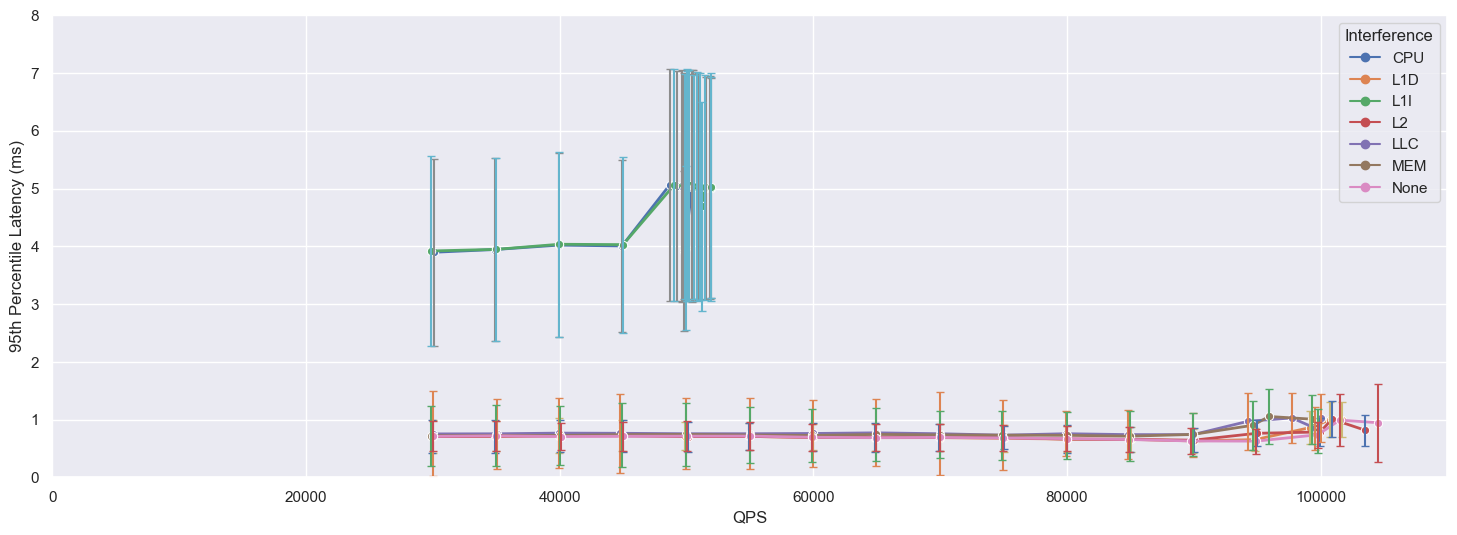

In [11]:
df_cpu['interference'] = 'CPU'
df_l1d['interference'] = 'L1D'
df_l1i['interference'] = 'L1I'
df_l2['interference'] = 'L2'
df_llc['interference'] = 'LLC'
df_mem['interference'] = 'MEM'
df_noinf['interference'] = 'None'

df = pd.concat([df_cpu, df_l1d, df_l1i, df_l2, df_llc, df_mem, df_noinf], ignore_index=True)
df['p95'] = df['p95'] / 1000
df['std'] = df['std'] / 1000

import matplotlib.lines as mlines

def plot_line_graph(dataframe, x_col, y_col, hue_col, x_label, y_label, output_filename, plot_error_bars=True):
    sns.set(style="darkgrid")
    plt.figure(figsize=(18, 6))

    sns.lineplot(
        data=dataframe,
        x=x_col,
        y=y_col,
        hue=hue_col,
        marker="o",
        err_style="bars" if plot_error_bars else None,
        errorbar=None,
        linewidth=2
    )

    if plot_error_bars:
        for interference in dataframe[hue_col].unique():
            subset = dataframe[dataframe[hue_col] == interference]
            plt.errorbar(
                x=subset[x_col],
                y=subset[y_col],
                yerr=subset['std'],
                linestyle="",
                capsize=3,
                label=None
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Set x-axis and y-axis range
    plt.xlim(0, 110000)
    plt.ylim(0, 8)

    # Create custom legend handles
    legend_handles = [
        mlines.Line2D([], [], color=sns.color_palette()[i], marker='o', linestyle='-', label=label)
        for i, label in enumerate(dataframe[hue_col].unique())
    ]
    plt.legend(handles=legend_handles, title='Interference')

    # Save the plot as a PNG and SVG file
    plt.savefig(output_filename + '.png', dpi=500)
    plt.savefig(output_filename + '.svg', format='svg')

    plt.show()


plot_line_graph(
    df,
    x_col='QPS',
    y_col='p95',
    hue_col='interference',
    x_label='QPS',
    y_label='95th Percentile Latency (ms)',
    output_filename='../part1-plots/plot',
    plot_error_bars=True
)